In [21]:
import pandas as pd 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Bagging

In [22]:
if __name__ == "__main__":
    dt = pd.read_csv('./data/ECommerce_consumer_behaviour.csv')

    X = dt.drop(['reordered', 'department', 'product_name', 'days_since_prior_order'], axis=1)
    y = dt['reordered']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35) 

    # Entrenar el clasificador KNeighbors
    Knn_class = KNeighborsClassifier().fit(X_train, y_train)
    
    # Predecir con el clasificador KNeighbors
    Knn_pred = Knn_class.predict(X_test)
    print("=" * 64)
    print("Accuracy KNeighbors:", accuracy_score(Knn_pred, y_test))

    # Crear el clasificador BaggingClassifier con el clasificador KNeighbors como base
    bag_class = BaggingClassifier(base_estimator=KNeighborsClassifier(), n_estimators=50)
    
    # Entrenar el clasificador BaggingClassifier
    bag_class.fit(X_train, y_train)

    # Predecir con el clasificador BaggingClassifier
    bag_pred = bag_class.predict(X_test)
    print("=" * 64)
    print("Accuracy BaggingClassifier:", accuracy_score(bag_pred, y_test))
    print("=" * 64)

/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be

Accuracy KNeighbors: 0.7042857142857143
Accuracy BaggingClassifier: 0.6971428571428572


/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(d

In [23]:
dt['reordered'].describe()

count    1999.000000
mean        0.572286
std         0.494871
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: reordered, dtype: float64

In [24]:
dt.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', 'department_id', 'department', 'product_name'],
      dtype='object')

/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(d

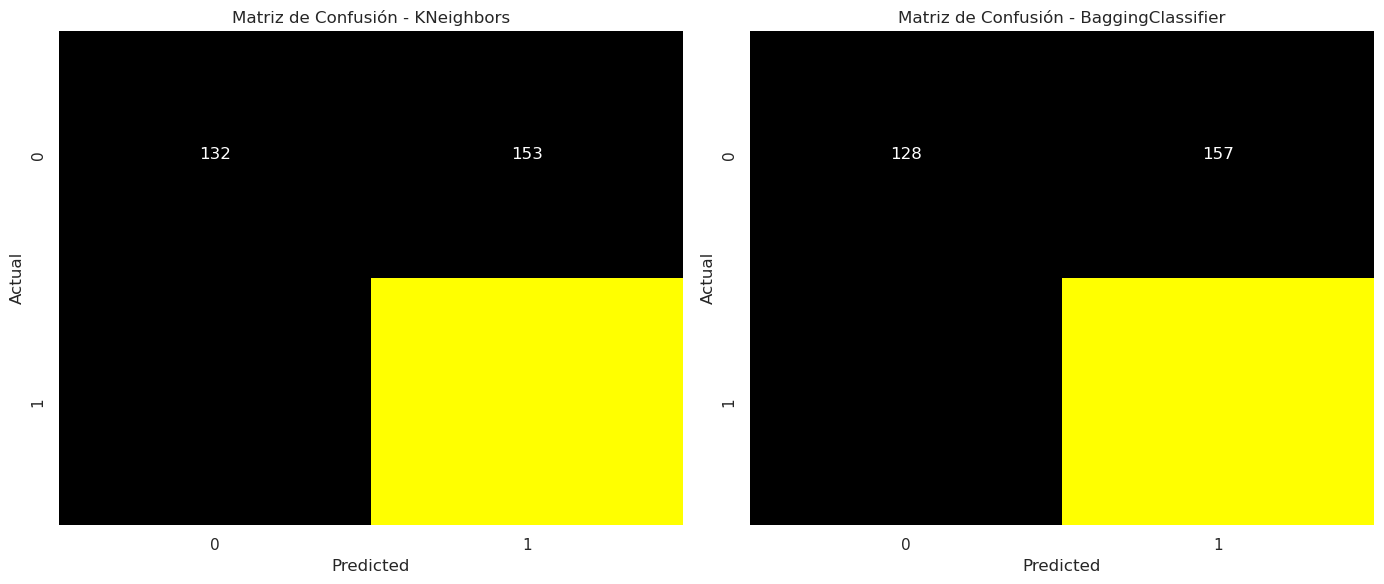

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Crear matriz de confusión para KNeighbors
cm_knn = confusion_matrix(y_test, Knn_pred)

# Crear matriz de confusión para BaggingClassifier
cm_bag = confusion_matrix(y_test, bag_pred)

# Configurar estilo y colores de la gráfica
sns.set(style="whitegrid")
colors = ["black", "yellow"]

# Configurar el tamaño de la figura
plt.figure(figsize=(14, 6))

# Subgráfica 1 - KNeighbors
plt.subplot(1, 2, 1)
sns.heatmap(cm_knn, annot=True, fmt='g', cmap=colors, cbar=False)
plt.title('Matriz de Confusión - KNeighbors')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Subgráfica 2 - BaggingClassifier
plt.subplot(1, 2, 2)
sns.heatmap(cm_bag, annot=True, fmt='g', cmap=colors, cbar=False)
plt.title('Matriz de Confusión - BaggingClassifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Ajustar el diseño
plt.tight_layout()

# Mostrar la gráfica
plt.show()

    Boosting

In [28]:
from sklearn.ensemble import GradientBoostingClassifier

if __name__ == "__main__":
    dt = pd.read_csv('./data/ECommerce_consumer_behaviour.csv')

    X = dt.drop(['reordered', 'department', 'product_name', 'days_since_prior_order'], axis=1)
    y = dt['reordered']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)

    boost = GradientBoostingClassifier(n_estimators=50).fit(X_train, y_train)
    boss_pred = boost.predict(X_test)
    print("=" * 64)
    print("Accuracy GradientBoosting:", accuracy_score(boss_pred, y_test))
    print("=" * 64)

Accuracy GradientBoosting: 0.7214285714285714


/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be

/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be

Accuracy GradientBoosting: 0.7214285714285714


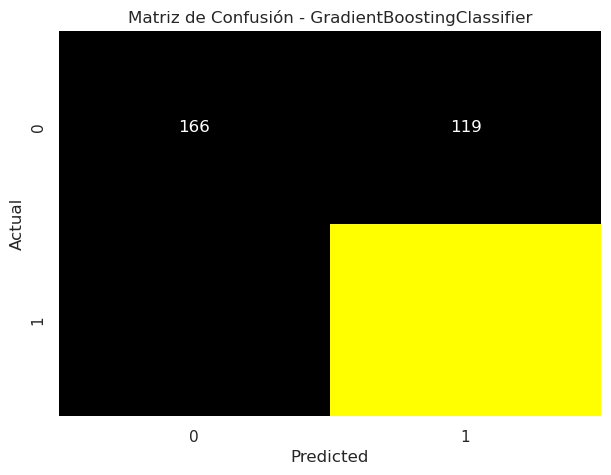

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Entrenar el clasificador GradientBoostingClassifier
boost = GradientBoostingClassifier(n_estimators=50).fit(X_train, y_train)

# Predecir con el clasificador GradientBoostingClassifier
boss_pred = boost.predict(X_test)
print("=" * 64)
print("Accuracy GradientBoosting:", accuracy_score(boss_pred, y_test))
print("=" * 64)

# Crear matriz de confusión para GradientBoostingClassifier
cm_boost = confusion_matrix(y_test, boss_pred)

# Configurar estilo y colores de la gráfica
sns.set(style="whitegrid")
colors = ["black", "yellow"]

# Configurar el tamaño de la figura
plt.figure(figsize=(7, 5))

# Graficar la matriz de confusión
sns.heatmap(cm_boost, annot=True, fmt='g', cmap=colors, cbar=False)
plt.title('Matriz de Confusión - GradientBoostingClassifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Mostrar la gráfica
plt.show()